<a href="https://colab.research.google.com/github/Iamsunil06/AI-ML-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


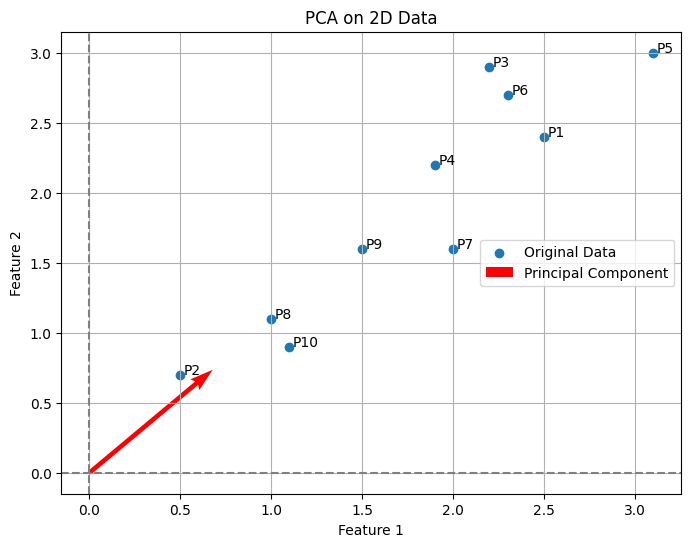

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2
